Engy-5050 Spring 2022 UMass Lowell; Prof. V. F. de Almeida **14Jan2022**

# 08. Bare Fuel Cylinder Criticality

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---
## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Symmetry/Dirichlet Boundary Conditions](#poisson)
1. [Rayleigh-Ritz or Galerkin's Method w/ Finite Element Basis Functions](#fem)
1. [No-Leakage Case](#no-leakage)
   + [Data](#data)
   + [Finite Element Lagrange Basis Functions](#fembf)
   + [Results](#results)
   + [Criticality](#criticality)
     - [Data](#datac)
     - [Results](#resultsc)
1. [Leakage Case](#leakage)
   + [Data](#data-2)
   + [Finite Element Lagrange Basis Functions](#fembf-2)
   + [Results](#results-2)
   + [Criticality](#criticality-2)
     - [Data](#datac-2)
     - [Results](#resultsc-2)
---

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D cartesian coordinates, neutron diffusion criticality problem in a bare slab.

## [Boundary-Value Problem Statement](#toc)<a id="poisson"></a>

Solve the neutron flux intensity criticality problem. Find $u:[0,r_b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{1}{r}\bigl(-D\, r\,u'\bigr)'(r) + \bigl(\frac{1}{k}\nu\Sigma_f - \Sigma_a\bigr)\,u(r) &= 0 \quad\quad \forall \quad\quad x\in\ ]0,r_b[, \\
 u'(a) &= 0, \\
 u(b) &= 0.
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, neutron multiplication factor, $k$, and macroscopic absorption cross section, $\Sigma_a$.

## [Rayleigh-Ritz or Galerkin Finite Element Method](#toc)<a id="fem"></a>

The Rayleigh-Ritz method for computing an approximate solution to the above mentioned Poisson problem is: find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(0,r_b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(b) = 0, (u'_N,u'_N) < \infty \bigr\}$
and $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} - \lambda\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = D\,(\phi'_j,\phi'_i) - \lambda\,(\phi_j,\phi_i)$
  
and $\lambda = \frac{1}{k}\nu\Sigma_f - \Sigma_a$ or $k = \frac{\nu\Sigma_f}{\lambda + \Sigma_a}$.
  
This formulation only accommodates basis functions that satisfy the homogeneous boundary conditions. The problem is referred to as a *generalized eigenvalue problem*. In addition, in cylindrical coordinates, the inner products read

\begin{align*}
\bigl(-D\, \phi_j',\phi_i'\bigr) &= \int\limits_0^{R_\infty} D(r)\, \phi_i'(r)\,\phi_j'(r)\, r\,dr  \\
\bigl(\Sigma_a\,\phi_i,\phi_j\bigr) &= \int\limits_0^{R_\infty} \Sigma_a(r)\,\phi_i(r)\,\phi_j(r)\,r\,dr \\
\end{align*}

## [No-Leakage Case](#toc)<a id="no-leakage"></a>

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 10.0 cm
> + D = 1.44 cm
> + $\Sigma_a$ = 0.1 cm^-1
> + $\Sigma_f$ = 0.1 cm^-1
> + $\nu$ = 2.4355

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter

In [2]:
'''Domain'''
r_b = 10*unit.cm

In [3]:
'''Parameters and data'''
diffusion_coeff_fuel = 1.44*unit.cm
sigma_a_fuel = 0.1/unit.cm
sigma_f_fuel = 0.1/unit.cm
nu = 2.4355 # average # of neutrons per fission
# sanity check
assert sigma_a_fuel >= sigma_f_fuel

### [Finite Element Basis Functions](#toc)<a id="fembf"></a>

Specify basis functions distribution on the material domain and degree.

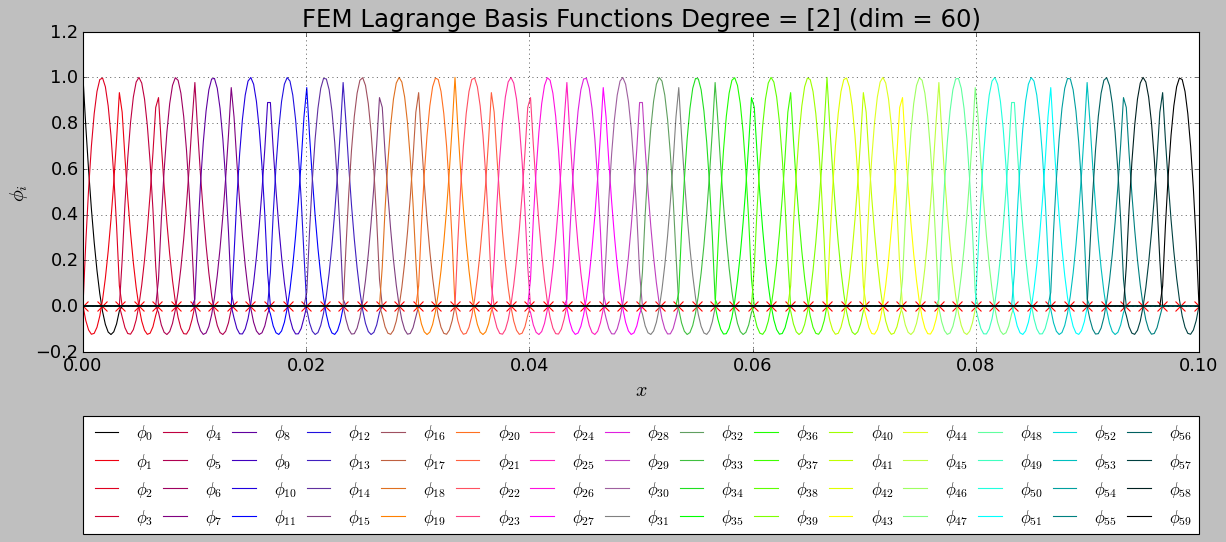

In [4]:
'''Build the basis functions'''

from engy_5310.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [30] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[0, r_b], bc_x_max='dirichlet')
femlb.plot(n_plot_pts=400, n_legend_cols=15)

  + $A_{i,j} = D\,(\phi'_j,\phi'_i) - \lambda\,(\phi_j,\phi_i)$

In [5]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff_fuel, "u'", "v'", coord_sys='cylindrical')
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v', coord_sys='cylindrical')

In [6]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(d_mtrx, tol=1e-5) == min(d_mtrx.shape):
    print('D is full rank.')
else:
    print('D is rank deficient.')

if matrix_rank(g_mtrx, tol=1e-7) == min(g_mtrx.shape):
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is full rank.
G is full rank.


In [7]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx)

In [8]:
import numpy as np
np.set_printoptions(precision=5)
print('lambda = ', lambda_vec[:5])
print('Buckling (material) = ', np.sqrt(lambda_vec[:5]/diffusion_coeff_fuel))

lambda =  [  8.32779  43.87866 107.83808 200.22342 321.04562]
Buckling (material) =  [ 24.04826  55.20081  86.5376  117.91694 149.31455]


In [9]:
k_vec = nu*sigma_f_fuel/(lambda_vec+sigma_a_fuel)

In [10]:
'''Eigenvalues'''
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.32886 0.45203 0.20668 0.11585 0.07357]


### [Results](#toc)<a id="results"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [11]:
'''Build the best approximation function in V_N'''

def u_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    return u_0

In [12]:
'''Build the derivative '''

def u_prime_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_0

In [13]:
'''Build the best approximation function in V_N'''

def u_flux_x(x, c_star_vec):
    return -diffusion_coeff_fuel*u_prime_star(x, c_star_vec)

In [15]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(0, r_b, 20)

c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])
u_values = u_star(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_values /= u_values[normalizing_val[0]]

flux_values = u_flux_x(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_values /= flux_values[normalizing_val[0]]

print('k = %2.5e'%k_vec[0])
print('')

print("   r [cm]        u [a.u.]      -D u'_x [a.u.]")
for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(x/unit.cm), '       %3.5f'%t, '      %3.5f'%q)

k = 1.32886e+00

   r [cm]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        1.00000       0.00002
 2)  0.53        0.99600       0.10866
 3)  1.05        0.98404       0.21608
 4)  1.58        0.96428       0.32083
 5)  2.11        0.93694       0.42175
 6)  2.63        0.90235       0.51778
 7)  3.16        0.86093       0.60730
 8)  3.68        0.81318       0.69011
 9)  4.21        0.75965       0.76410
10)  4.74        0.70098       0.82950
11)  5.26        0.63786       0.88501
12)  5.79        0.57104       0.93003
13)  6.32        0.50129       0.96476
14)  6.84        0.42943       0.98751
15)  7.37        0.35627       0.99975
16)  7.89        0.28266       1.00000
17)  8.42        0.20943       0.98936
18)  8.95        0.13738       0.96784
19)  9.47        0.06732       0.93541
20)  10.00        -0.00000       0.89366


In [17]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', -u_star(0, c_star_vec), ' u_N(b) = ', -u_star(r_b, c_star_vec))

u_N(a) =  [0.18599]  u_N(b) =  [-0.]


In [18]:
left_flux = (float(u_flux_x(0, c_star_vec)), 0.0)
normal = np.array((-1,0))

left_normal_flux = np.dot(np.array(left_flux), normal)
left_normal_flux

8.291304530821719e-07

In [19]:
right_flux = (float(u_flux_x(r_b, c_star_vec)), 0.0)
normal = np.array((1,0))

right_normal_flux = np.dot(np.array(right_flux), normal)
right_normal_flux

-0.033448763335740345

In [21]:
from scipy.integrate import quad
source = lambda x: lambda_vec[0] * u_star(x, c_star_vec) * x
(total_power, _) = quad(source, 0, r_b)
total_power

-0.003343690227735937

In [24]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%((left_normal_flux * 0 - right_normal_flux * r_b**2 - total_power)/total_power*100))

Total flux balance relative error [%] = -110.00 


In [28]:
'''Plot neutron flux modes'''
from engy_5310.toolkit import color_map

def plot_modes(k_vec, eigen_vec):

    k_vec = k_vec.round(5)
    n_pts = 300
    x = np.linspace(0, r_b, n_pts)
    
    
    import matplotlib.pyplot as plt
    plt.style.use('classic')
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    ax2 = ax1.twinx()
    
    colors = color_map(k_vec.shape[0])

    for j,k in enumerate(k_vec):
        c_star_vec = eigen_vec[:,j]/scipy.linalg.norm(eigen_vec[:,j])
        
        u_values = u_star(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
        u_values /= u_values[normalizing_val[0]]

        u_flux_x_values = u_flux_x(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_flux_x_values) == np.abs(u_flux_x_values).max())
        u_flux_x_values /= u_flux_x_values[normalizing_val[0]]

        ax1.plot(x/unit.cm, u_values, '-', label=r'Solution $k$=%2.2f'%k, color=colors[j])
        
        ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
        ax1.set_ylabel(r'$u_N$ [a.u.]', fontsize=18, color='black')
        ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.legend(loc='upper left', fontsize=12)
        ax1.grid(True)
        
        ax2.plot(x/unit.cm, u_flux_x_values,'--', color=colors[j], label='Flux $k$=%2.2f'%k)

        ax2.set_ylabel(r"$-D\,u'_N$ [a.u.]", fontsize=16, color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax2.legend(loc='upper right', fontsize=12)
        
    plt.title(r'Bare Fuel Slab Modes ($k$=%s # elem=%s, N=%i)'%(str(list(k_vec)),n_elem,len(femlb.basis_func_list)), fontsize=20)
    plt.show()

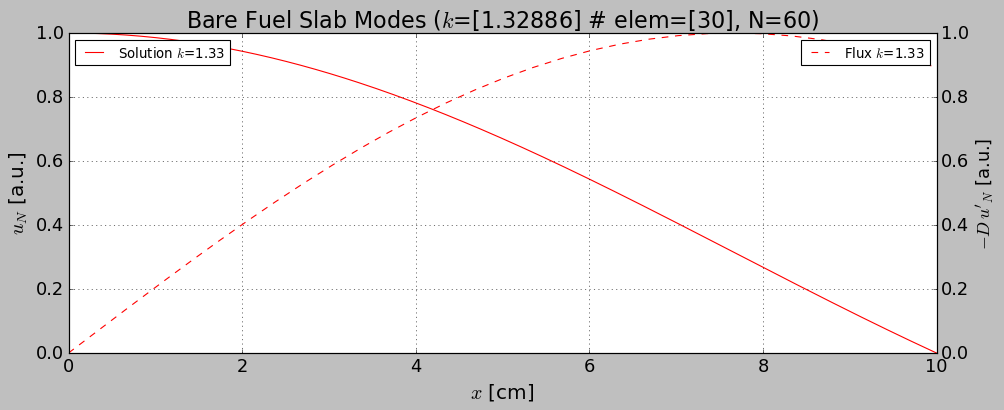

In [29]:
plot_modes(k_vec[0:1], eigen_vec[:,0:1])

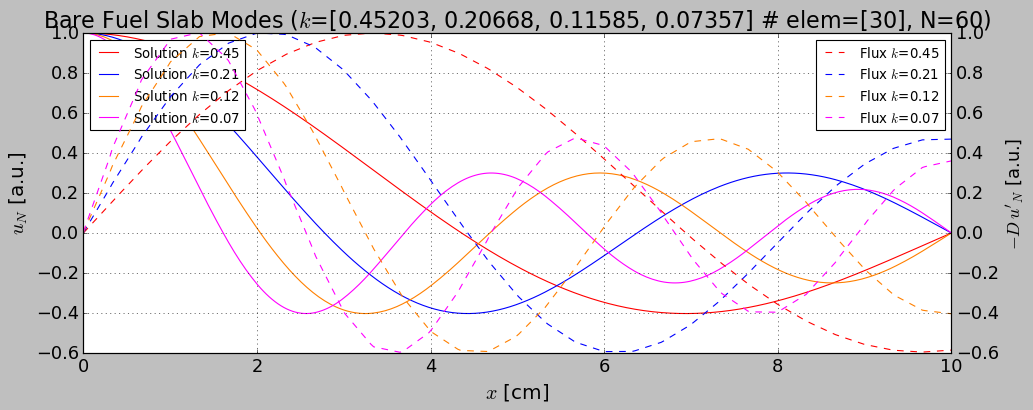

In [30]:
plot_modes(k_vec[1:5], eigen_vec[:,1:5])

In [31]:
'''Sigma_f critical'''
sigma_f_fuel_critical = sigma_f_fuel / k_vec[0]
print('Sigma_f critical = %2.4e [1/cm]'%(sigma_f_fuel_critical*unit.cm))
print('Fission relaxation length = %2.4e [cm]'%(1/(sigma_f_fuel_critical*unit.cm)))

Sigma_f critical = 7.5253e-02 [1/cm]
Fission relaxation length = 1.3289e+01 [cm]


### [Criticality](#toc)<a id="criticality"></a>
Use the adjusted $\Sigma_{fc}$ to verify the solution is critical.

#### [Data](#toc)<a id="datac"></a>

Solve problem with the modified parameter:

> + $\Sigma_{fc}$

*Assume all other parameters to remain the same.* This assumption is unlikely to hold because $D$ will likely change and an iterative process must be used even for this simple problem.


In [32]:
'''Build the matrix of coefficients of the linear system'''
# Note that the eigenvalue problem is the same as previously stated if D does not change
#diffusion_coeff_fuel *= 0.95
#d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff_fuel, "u'", "v'", coord_sys='cylindrical')
#g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v', coord_sys='cylindrical')

'Build the matrix of coefficients of the linear system'

In [33]:
'''Compute optimal coefficient eigenvectors'''
# Same solution as before
#import scipy
#lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx)

'Compute optimal coefficient eigenvectors'

#### [Results](#toc)<a id="resultsc"></a>

Multiplication factor of the critical solution.

In [34]:
'''Compute the new multiplication factor'''
k_vec = nu*sigma_f_fuel_critical/(lambda_vec+sigma_a_fuel)

In [35]:
'''Eigenvalues'''
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.      0.34017 0.15553 0.08718 0.05536]


## [Leakage Case](#toc)<a id="leakage"></a>
The solution is linearly extrapolated to zero at $u(b+\delta)$. Therefore a Robin boundary condition can be used at $x=b$ as described next.

### [Boundary-Value Problem Statement](#toc)<a id="bvp-2"></a>

Solve the neutron flux intensity criticality problem. Find $u:[0,r_b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{1}{r}\bigl(-D\, r\, u'\bigr)'(x) + \bigl(\frac{1}{k}\nu\Sigma_f - \Sigma_a\bigr)\,u(r) &= 0 \quad\quad \forall \quad\quad x\in\ ]0,r_b[, \\
 u'(0) &= 0, \\
 q_n(r_b) &= \frac{D}{\delta}\,u(r_b).
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, neutron multiplication factor, $k$, macroscopic absorption cross section, $\Sigma_a$, and the extrapolation distance, $\delta$, in the $r$ direction.

## [Rayleigh-Ritz or Galerkin Finite Element Method](#toc)<a id="fem-2"></a>

The Rayleigh-Ritz method for computing an approximate solution to the above mentioned Poisson problem is: find $u^*_N \in V_N(a,b)\subset V(0,r_b) = \bigl\{ u:[0,r_b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid (u'_N,u'_N) < \infty \bigr\}$
and $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} - \lambda\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = D\,(\phi'_j,\phi'_i) + \frac{D}{\delta}\phi_j(r_b)\,\phi_i(r_b)\,r_b - \lambda\,(\phi_j,\phi_i) $
  
and $\lambda = \frac{1}{k}\nu\Sigma_f - \Sigma_a$ or $k = \frac{\nu\Sigma_f}{\lambda + \Sigma_a}$.
  
This formulation only accommodates basis functions that satisfy the homogeneous boundary conditions.

### [Data](#toc)<a id="data-2"></a>

Solve problem with the same parameters as before and:

> + $\delta$ = 1 cm

In [36]:
'''Parameters and data'''

delta = 1*unit.cm

### [Finite Element Basis Functions](#toc)<a id="fembf-2"></a>

Specify basis functions distribution on the material domain and degree.

In [38]:
'''Build the basis functions'''

from engy_5310.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [30] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[0, r_b])
#femlb.plot(n_plot_pts=400)

  + $A_{i,j} = D\,(\phi'_j,\phi'_i) + \frac{D}{\delta}\phi_j(r_b)\,\phi_i(r_b) \, r_b - \lambda\,(\phi_j,\phi_i)$

In [40]:
d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff_fuel, "u'", "v'", coord_sys='cylindrical')
d_mtrx += femlb.boundary_inner_product_matrix('right', lambda x: diffusion_coeff_fuel/delta * r_b, 'u', 'v')
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v')

In [41]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(d_mtrx) == min(d_mtrx.shape):
    print('D is full rank.')
else:
    print('D is rank deficient.')

if matrix_rank(g_mtrx) == min(g_mtrx.shape):
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is full rank.
G is full rank.


In [42]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx)

In [43]:
import numpy as np
np.set_printoptions(precision=5)
print('lambda = ', lambda_vec[:5])
print('Buckling (material) = ', np.sqrt(lambda_vec[:5]/diffusion_coeff_fuel))

lambda =  [0.18847 0.99483 2.4523  4.5709  7.3625 ]
Buckling (material) =  [ 3.61772  8.31175 13.04985 17.81638 22.6116 ]


In [44]:
k_vec = nu*sigma_f_fuel/(lambda_vec+sigma_a_fuel)

In [45]:
'''Eigenvalues'''
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [2.39045 2.21513 1.95586 1.67148 1.40274]


### [Results](#toc)<a id="results-2"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [47]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(0, r_b, 20)

c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])

u_values = u_star(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_values /= u_values[normalizing_val[0]]

flux_values = u_flux_x(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_values /= flux_values[normalizing_val[0]]

print('k = %2.5e'%k_vec[0])
print('')

print("   r [cm]        u [a.u.]      -D u'_x [a.u.]")
for i,(r,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(r/unit.cm), '       %3.5f'%t, '      %3.5f'%q)

k = 2.39045e+00

   r [cm]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        1.00000       1.00000
 2)  0.53        0.93229       0.96601
 3)  1.05        0.86691       0.93272
 4)  1.58        0.80378       0.90022
 5)  2.11        0.74287       0.86846
 6)  2.63        0.68413       0.83743
 7)  3.16        0.62749       0.80715
 8)  3.68        0.57292       0.77754
 9)  4.21        0.52036       0.74869
10)  4.74        0.46976       0.72048
11)  5.26        0.42109       0.69296
12)  5.79        0.37429       0.66612
13)  6.32        0.32931       0.63989
14)  6.84        0.28612       0.61435
15)  7.37        0.24466       0.58940
16)  7.89        0.20491       0.56509
17)  8.42        0.16680       0.54138
18)  8.95        0.13031       0.51826
19)  9.47        0.09539       0.49574
20)  10.00        0.06200       0.47376


In [50]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', -u_star(0, c_star_vec), ' u_N(b) = ', -u_star(0, c_star_vec))

u_N(a) =  [-0.23337]  u_N(b) =  [-0.23337]


In [51]:
left_flux = (float(u_flux_x(0, c_star_vec)), 0.0)
normal = np.array((-1,0))

left_normal_flux = np.dot(np.array(left_flux), normal)
left_normal_flux

-0.04398065781977664

In [52]:
right_flux = (float(u_flux_x(r_b, c_star_vec)), 0.0)
normal = np.array((1,0))

right_normal_flux = np.dot(np.array(right_flux), normal)
right_normal_flux

0.020836261864603724

In [53]:
from scipy.integrate import quad
source = lambda x: lambda_vec[0] * u_star(x, c_star_vec) * x
(total_power, _) = quad(source, 0, r_b)
total_power

6.999935178864488e-05

In [55]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%(100*(left_normal_flux * 0**2 + right_normal_flux * r_b**2 - total_power)/total_power))

Total flux balance relative error [%] = 197.66 


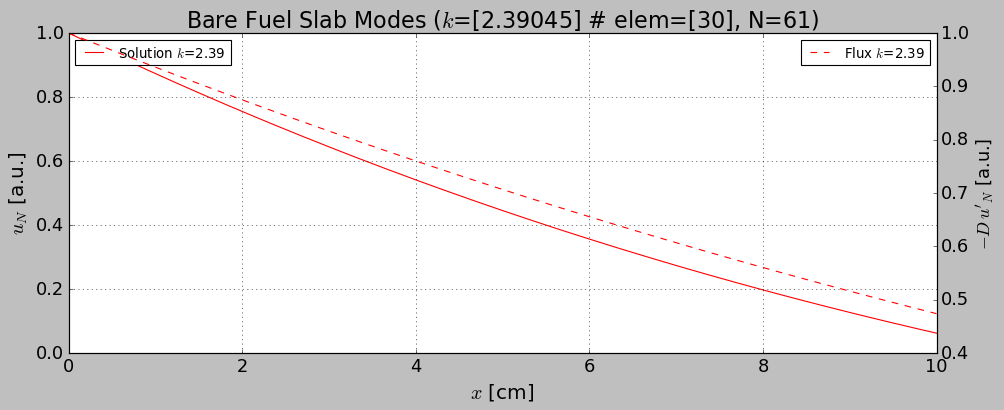

In [56]:
plot_modes(k_vec[0:1], np.abs(eigen_vec[:,0:1]))

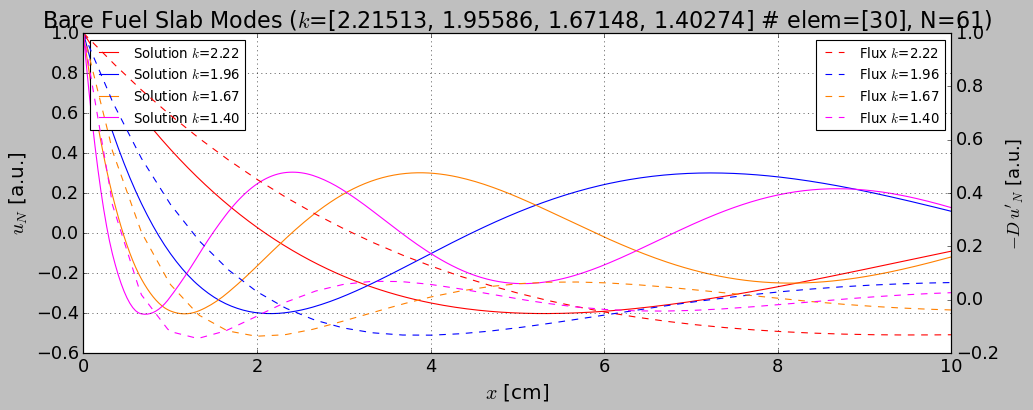

In [57]:
plot_modes(k_vec[1:5], eigen_vec[:,1:5])

### [Criticality](#toc)<a id="criticality-2"></a>
Use the adjusted $\Sigma_{fc}$ to verify the solution is critical.

#### [Data](#toc)<a id="datac-2"></a>

Solve problem with the modified parameter:

> + $\Sigma_{fc}$

*Assume all other parameters to remain the same.* This assumption is unlikely to hold because $D$ will likely change and an iterative process must be used even for this simple problem.


In [58]:
'''Sigma_f critical'''
sigma_f_fuel_critical = sigma_f_fuel / k_vec[0]
print('Sigma_f critical = %2.4e [1/cm]'%(sigma_f_fuel_critical*unit.cm))
print('Fission relaxation length = %2.4e [cm]'%(1/(sigma_f_fuel_critical*unit.cm)))

Sigma_f critical = 4.1833e-02 [1/cm]
Fission relaxation length = 2.3904e+01 [cm]


#### [Results](#toc)<a id="resultsc-2"></a>

Multiplication factor of the critical solution.

In [59]:
k_vec = nu*sigma_f_fuel_critical/(lambda_vec+sigma_a_fuel)

In [60]:
'''Critical Eigenvalues'''
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.      0.92666 0.8182  0.69923 0.58681]
